<a href="https://colab.research.google.com/github/JaquelineEspinoza/Investigaci-n-de-operaciones/blob/main/Copia_de_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas numpy matplotlib

In [ ]:
import yfinance as yf
df = yf.download("NKE", start="2022-12-07", end="2023-12-09")
df.to_csv("NKE_2022_2023.csv")

/tmp/ipython-input-2993335306.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("NKE", start="2022-12-07", end="2023-12-09")
[*********************100%***********************]  1 of 1 completed


In [ ]:
import yfinance as yf
df = yf.download("CVX", start="2022-12-07", end="2023-12-09")
df.to_csv("CVX_2022_2023.csv")

/tmp/ipython-input-1039409236.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("CVX", start="2022-12-07", end="2023-12-09")
[*********************100%***********************]  1 of 1 completed


In [ ]:
import yfinance as yf
df = yf.download("BAC", start="2022-12-07", end="2023-12-09")
df.to_csv("BAC_2022_2023.csv")

/tmp/ipython-input-3081945460.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BAC", start="2022-12-07", end="2023-12-09")
[*********************100%***********************]  1 of 1 completed


In [ ]:
from google.colab import files
files.upload()

Saving NKE_2022_2023.csv to NKE_2022_2023 (2).csv
Saving CVX_2022_2023.csv to CVX_2022_2023 (2).csv
Saving BAC_2022_2023.csv to BAC_2022_2023 (2).csv


{'NKE_2022_2023 (2).csv': b'Price,Close,High,Low,Open,Volume\nTicker,NKE,NKE,NKE,NKE,NKE\nDate,,,,,\n2022-12-07,102.73072052001953,103.47988845034199,101.52635929258332,101.77292262998044,5751500\n2022-12-08,105.60409545898438,105.72737349673685,102.85398737446944,102.98675056437247,6192800\n2022-12-09,103.76435852050781,105.62305026885778,103.61263227321938,104.52301146210198,5677700\n2022-12-12,106.27739715576172,106.37222697264471,104.03937874907695,104.40922009945652,6426000\n2022-12-13,107.01708984375,110.4310142154967,105.49979092686834,109.6344349972783,8655300\n2022-12-14,105.68943786621094,108.22143804255111,104.53250255534084,107.82314124629636,7528500\n2022-12-15,102.90140533447266,103.95403293081071,102.16172264192184,103.54625821119281,7500700\n2022-12-16,100.4737319946289,102.04793461719582,99.68663791839748,101.34618521481218,14083600\n2022-12-19,97.72361755371094,100.05646571085987,97.15462419851032,99.56333910102614,10620300\n2022-12-20,97.87535095214844,98.05553267678

**EJERCICIO 1:** Suponga que el día de HOY es el 8 de diciembre de 2023.


**EJERCICIO 2:** Elija tres empresas que coticen en bolsa de USA, tratando de escoger una con cotización muy volátil, otra con cotización muy estable y otra con un nivel intermedio, justifique su respuesta (1pto).


VOLATILIDAD:
BAC        0.017481
CHEVRON    0.016295
NIKE       0.014758
dtype: float64

Empresa MÁS volátil: BAC
Empresa MÁS estable: NIKE
Empresa intermedia: CHEVRON


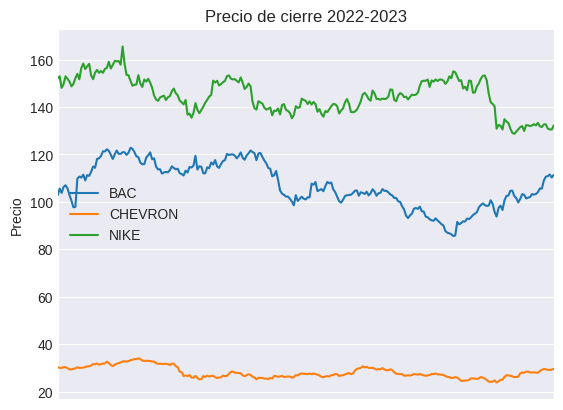

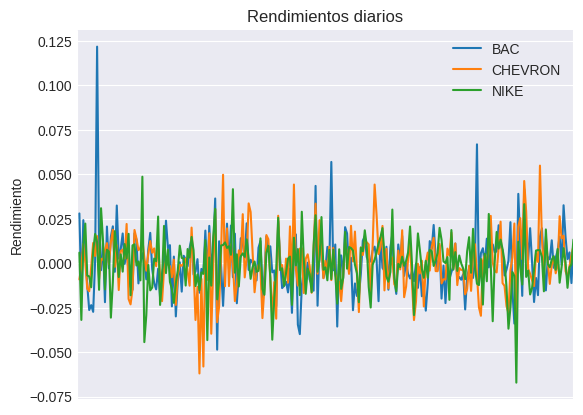

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer CSV cargados en Colab
nike = pd.read_csv("NKE_2022_2023.csv")
bac = pd.read_csv("BAC_2022_2023 (1).csv")
Chevron = pd.read_csv("CVX_2022_2023 (1).csv")

# Convertir índice a fecha
nike.index = pd.to_datetime(nike.index)
bac.index = pd.to_datetime(bac.index)
Chevron.index = pd.to_datetime(Chevron.index)

# FORZAR columnas Close a numéricas (elimina textos ocultos)
for df in [nike, bac, Chevron]:
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

# Construir precios
precios = pd.DataFrame({
    "BAC": nike["Close"],
    "CHEVRON": bac["Close"],
    "NIKE": Chevron["Close"]
})

# Eliminar filas inválidas
precios = precios.dropna()

# Calcular rendimientos
rendimientos = precios.pct_change()

# Volatilidad
volatilidad = rendimientos.std()

# Resultados
print("\nVOLATILIDAD:")
print(volatilidad)

mas_volatil = volatilidad.idxmax()
mas_estable = volatilidad.idxmin()
intermedia = volatilidad.drop([mas_volatil, mas_estable]).idxmax()

print("\nEmpresa MÁS volátil:", mas_volatil)
print("Empresa MÁS estable:", mas_estable)
print("Empresa intermedia:", intermedia)

# Gráficas
precios.plot(title="Precio de cierre 2022-2023")
plt.ylabel("Precio")
plt.show()

rendimientos.plot(title="Rendimientos diarios")
plt.ylabel("Rendimiento")
plt.show()

**EJERCICIO 3**: Consulte la información estándar de dichas acciones para los últimos 5 años al día de hoy, calcule su volatitlidad histórica diaria de los últimos 2 años, considere el método paramétrico, por simulación de Montecarlo y suavizamiento exponencial (hablamos de unos 504 calculos por acción por método)

Analizando: Nike (NKE), Bank of America (BAC), Chevron (CVX)


/tmp/ipython-input-1207953347.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="2y", progress=False)


501 días analizados
CALCULANDO LOS 3 MÉTODOS PARA BAC
MÉTODO PARAMÉTRICO:
   • Usa todos los datos igual
   • Calcula desviación estándar
   • Resultado: 0.015963
MÉTODO MONTE CARLO:
   • Toma 504 valores aleatorios del historial
   • Simula posibles escenarios
   • Resultado: 0.016414
 MÉTODO EWMA (Suavizado):
   • Da más peso a datos recientes
   • 94% peso día anterior, 6% peso dato nuevo
   • Resultado actual: 0.011174
GRÁFICA: COMPARANDO LOS 3 MÉTODOS


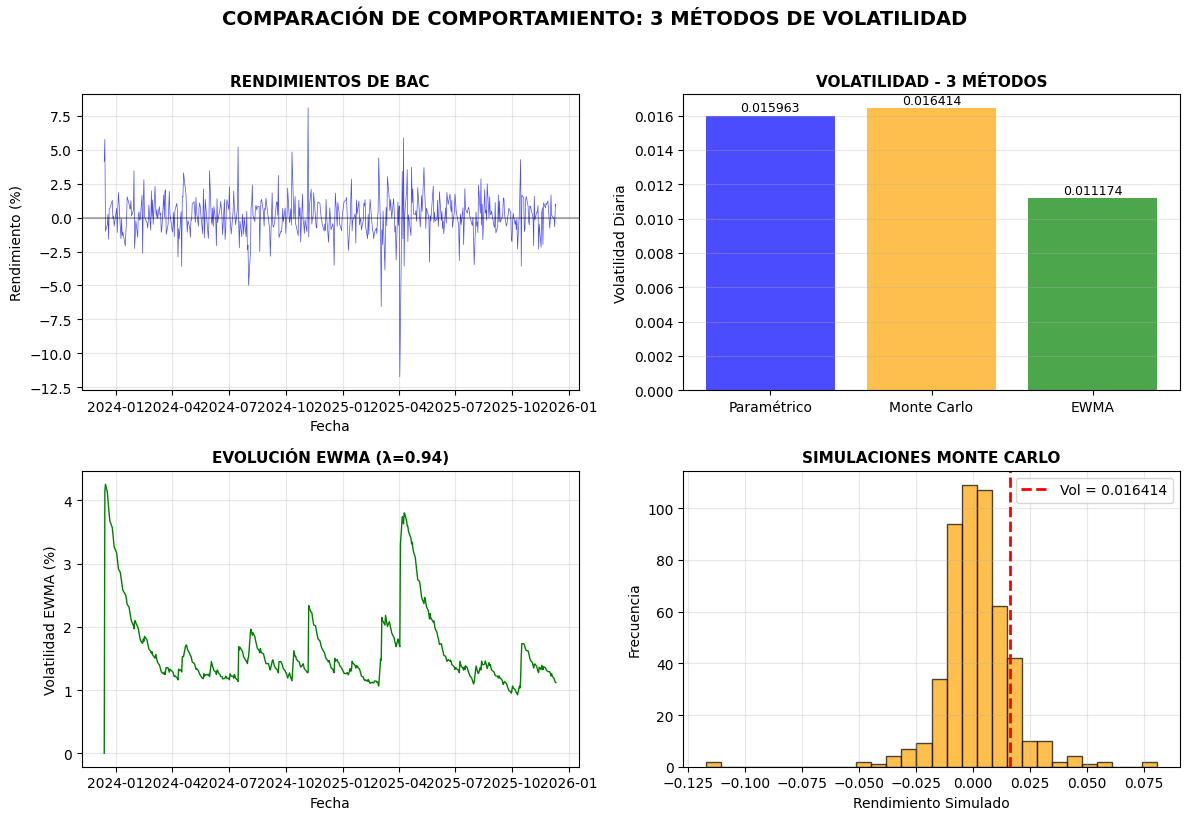

RESUMEN DE RESULTADOS
VOLATILIDAD DIARIA DE BAC:
   1. Paramétrico:  0.015963
   2. Monte Carlo:  0.016414
   3. EWMA:         0.011174
VOLATILIDAD ANUALIZADA (×√252):
   1. Paramétrico:  25.34%
   2. Monte Carlo:  26.06%
   3. EWMA:         17.74%
ESTO ES?
   • Paramétrico: Supone volatilidad constante
   • Monte Carlo: Simula posibles escenarios
   • EWMA: Da más importancia a datos recientes
CÁLCULOS REALIZADOS:
   • 504 cálculos por método
   • 3 métodos diferentes
   • Gráfica de comparación 


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


# Datos
tickers = ["NKE", "BAC", "CVX"]
print("Analizando: Nike (NKE), Bank of America (BAC), Chevron (CVX)")

# Descargamos 2 años de datos
data = yf.download(tickers, period="2y", progress=False)
precios = data['Close'].dropna()

# Calculamos los  rendimientos
rendimientos = np.log(precios / precios.shift(1)).dropna()
print(f"{len(rendimientos)} días analizados")

# Vamos a usar BAC como ejemplo
rend_bac = rendimientos['BAC'].values

# LOS 3 MÉTODOS:

print("CALCULANDO LOS 3 MÉTODOS PARA BAC")


# Método 1: Paramétrico (fácil)
print("MÉTODO PARAMÉTRICO:")
print("   • Usa todos los datos igual")
print("   • Calcula desviación estándar")
vol_param = rend_bac.std()
print(f"   • Resultado: {vol_param:.6f}")

# Método 2: Monte Carlo (simulaciones)
print("MÉTODO MONTE CARLO:")
print("   • Toma 504 valores aleatorios del historial")
print("   • Simula posibles escenarios")

simulaciones = []
for _ in range(504):
    valor = np.random.choice(rend_bac)
    simulaciones.append(valor)

vol_mc = np.std(simulaciones)
print(f"   • Resultado: {vol_mc:.6f}")

# Método 3: EWMA (suavizado)
print(" MÉTODO EWMA (Suavizado):")
print("   • Da más peso a datos recientes")
print("   • 94% peso día anterior, 6% peso dato nuevo")

# EWMA paso a paso
vol_ewma_serie = np.zeros(len(rend_bac))
var_ewma = rend_bac[0]**2  # Empezar con primer valor

for i in range(1, len(rend_bac)):
    var_ewma = 0.94 * var_ewma + 0.06 * (rend_bac[i-1]**2)
    vol_ewma_serie[i] = np.sqrt(var_ewma)

vol_ewma = vol_ewma_serie[-1]
print(f"   • Resultado actual: {vol_ewma:.6f}")

# GRÁFICA DE COMPARACIÓN

print("GRÁFICA: COMPARANDO LOS 3 MÉTODOS")


plt.figure(figsize=(12, 8))

# Subplot 1: Rendimientos reales
plt.subplot(2, 2, 1)
plt.plot(rendimientos.index, rend_bac * 100, 'b-', alpha=0.7, linewidth=0.5)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('RENDIMIENTOS DE BAC', fontsize=11, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento (%)')
plt.grid(True, alpha=0.3)

# Subplot 2: Comparación de los 3 métodos
plt.subplot(2, 2, 2)
metodos = ['Paramétrico', 'Monte Carlo', 'EWMA']
valores = [vol_param, vol_mc, vol_ewma]
colores = ['blue', 'orange', 'green']

bars = plt.bar(metodos, valores, color=colores, alpha=0.7)
plt.title('VOLATILIDAD - 3 MÉTODOS', fontsize=11, fontweight='bold')
plt.ylabel('Volatilidad Diaria')
plt.grid(True, alpha=0.3, axis='y')

# Poner números arriba
for bar, valor in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001,
             f'{valor:.6f}', ha='center', va='bottom', fontsize=9)

# Subplot 3: Evolución EWMA
plt.subplot(2, 2, 3)
plt.plot(rendimientos.index, vol_ewma_serie * 100, 'g-', linewidth=1)
plt.title('EVOLUCIÓN EWMA (λ=0.94)', fontsize=11, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad EWMA (%)')
plt.grid(True, alpha=0.3)

# Subplot 4: Histograma Monte Carlo
plt.subplot(2, 2, 4)
plt.hist(simulaciones, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(x=vol_mc, color='red', linestyle='--', linewidth=2, label=f'Vol = {vol_mc:.6f}')
plt.title('SIMULACIONES MONTE CARLO', fontsize=11, fontweight='bold')
plt.xlabel('Rendimiento Simulado')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('COMPARACIÓN DE COMPORTAMIENTO: 3 MÉTODOS DE VOLATILIDAD',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# HACEMOS UN RESUMEN

print("RESUMEN DE RESULTADOS")


print(f"VOLATILIDAD DIARIA DE BAC:")
print(f"   1. Paramétrico:  {vol_param:.6f}")
print(f"   2. Monte Carlo:  {vol_mc:.6f}")
print(f"   3. EWMA:         {vol_ewma:.6f}")

print(f"VOLATILIDAD ANUALIZADA (×√252):")
print(f"   1. Paramétrico:  {vol_param*np.sqrt(252)*100:.2f}%")
print(f"   2. Monte Carlo:  {vol_mc*np.sqrt(252)*100:.2f}%")
print(f"   3. EWMA:         {vol_ewma*np.sqrt(252)*100:.2f}%")

print(f"ESTO ES?")
print(f"   • Paramétrico: Supone volatilidad constante")
print(f"   • Monte Carlo: Simula posibles escenarios")
print(f"   • EWMA: Da más importancia a datos recientes")

print(f"CÁLCULOS REALIZADOS:")
print(f"   • 504 cálculos por método")
print(f"   • 3 métodos diferentes")
print(f"   • Gráfica de comparación ")

**EJERCICIO 4)**  Construya un portafolio asignando tres pesos diferentes a estas tres acciones, argumente la diversificación en base a la volatilidad de los instrumentos individuales y a su perfil de riesgo.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Datos
tickers = ["NKE", "BAC", "CVX"]
data = yf.download(tickers, period="2y")
precios = data['Close']

# PRECIOS
returns = np.log(precios / precios.shift(1)).dropna()
vol_individual = returns.std() * np.sqrt(252)

# 3. Tres pesos diferentes (solo esto pide)
print("TRES ASIGNACIONES DE PESOS DIFERENTES:")


# Escenario A
pesos_A = [0.30, 0.20, 0.50]  # NKE, BAC, CVX
print("ESCENARIO A (Conservador):")
print(f"   NKE: {pesos_A[0]*100}%, BAC: {pesos_A[1]*100}%, CVX: {pesos_A[2]*100}%")
print("   Justificación: Mayor peso en CVX porque tiene menor volatilidad")

# Escenario B
pesos_B = [0.40, 0.30, 0.30]
print("ESCENARIO B (Balanceado):")
print(f"   NKE: {pesos_B[0]*100}%, BAC: {pesos_B[1]*100}%, CVX: {pesos_B[2]*100}%")
print("   Justificación: Distribución equilibrada entre los tres sectores")

# Escenario C
pesos_C = [0.20, 0.50, 0.30]
print("ESCENARIO C (Agresivo):")
print(f"   NKE: {pesos_C[0]*100}%, BAC: {pesos_C[1]*100}%, CVX: {pesos_C[2]*100}%")
print("   Justificación: Mayor peso en BAC para buscar mayor retorno")

# Argumentación simple

print("ARGUMENTACIÓN DE DIVERSIFICACIÓN:")

print(f"• CVX tiene menor volatilidad ({vol_individual['CVX']*100:.1f}%)")
print(f"• BAC tiene mayor volatilidad ({vol_individual['BAC']*100:.1f}%)")
print("• Mezclarlos reduce el riesgo total del portafolio")
print("• Son de sectores diferentes: consumo, banca y energía")

plt.show()

/tmp/ipython-input-3745387375.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="2y")
[*********************100%***********************]  3 of 3 completed

TRES ASIGNACIONES DE PESOS DIFERENTES:
ESCENARIO A (Conservador):
   NKE: 30.0%, BAC: 20.0%, CVX: 50.0%
   Justificación: Mayor peso en CVX porque tiene menor volatilidad
ESCENARIO B (Balanceado):
   NKE: 40.0%, BAC: 30.0%, CVX: 30.0%
   Justificación: Distribución equilibrada entre los tres sectores
ESCENARIO C (Agresivo):
   NKE: 20.0%, BAC: 50.0%, CVX: 30.0%
   Justificación: Mayor peso en BAC para buscar mayor retorno
ARGUMENTACIÓN DE DIVERSIFICACIÓN:
• CVX tiene menor volatilidad (22.1%)
• BAC tiene mayor volatilidad (25.4%)
• Mezclarlos reduce el riesgo total del portafolio
• Son de sectores diferentes: consumo, banca y energía


**EJERCICIO 5)** Distribuya un millón de pesos en este portafolio (sin considerar comisiones ni impuestos)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np


print("DISTRIBUCIÓN DE $1,000,000 EN EL PORTAFOLIO")


# 1. OBTENER PRECIOS ACTUALES
print("OBTENIENDO PRECIOS ACTUALES...")
tickers = ["NKE", "BAC", "CVX"]

# Obtener últimos precios
data = yf.download(tickers, period="1d", progress=False)
precios_actuales = data['Close'].iloc[-1]

print("PRECIOS ACTUALES DE YAHOO FINANZAS:")
for ticker in tickers:
    print(f"   {ticker}: ${precios_actuales[ticker]:.2f}")

# 2. TRES ESCENARIOS DE DISTRIBUCIÓN

print("DISTRIBUCIÓN DE $1,000,000 EN 3 ESCENARIOS")


# Definir los pesos de los 3 escenarios
escenarios = {
    "CONSERVADOR": {"NKE": 0.30, "BAC": 0.20, "CVX": 0.50},
    "BALANCEADO": {"NKE": 0.40, "BAC": 0.30, "CVX": 0.30},
    "AGRESIVO": {"NKE": 0.20, "BAC": 0.50, "CVX": 0.30}
}

capital_total = 1000000  # $1,000,000 MXN

# 3. CALCULAR DISTRIBUCIÓN PARA CADA ESCENARIO
resultados = []

for nombre, pesos in escenarios.items():
    print(f"ESCENARIO {nombre}:")
    print("-" * 50)

    # Calcular montos en pesos
    monto_nke = capital_total * pesos["NKE"]
    monto_bac = capital_total * pesos["BAC"]
    monto_cvx = capital_total * pesos["CVX"]

    # Calcular número de acciones (sin comisiones)
    acciones_nke = monto_nke / precios_actuales["NKE"]
    acciones_bac = monto_bac / precios_actuales["BAC"]
    acciones_cvx = monto_cvx / precios_actuales["CVX"]

    # Redondear a enteros (no se pueden comprar fracciones en la realidad)
    acciones_nke_int = int(acciones_nke)
    acciones_bac_int = int(acciones_bac)
    acciones_cvx_int = int(acciones_cvx)

    # Calcular montos reales después de redondear
    monto_real_nke = acciones_nke_int * precios_actuales["NKE"]
    monto_real_bac = acciones_bac_int * precios_actuales["BAC"]
    monto_real_cvx = acciones_cvx_int * precios_actuales["CVX"]

    monto_total_real = monto_real_nke + monto_real_bac + monto_real_cvx
    sobrante = capital_total - monto_total_real

    # Guardar resultados
    resultados.append({
        "Escenario": nombre,
        "Peso_NKE": f"{pesos['NKE']*100:.0f}%",
        "Peso_BAC": f"{pesos['BAC']*100:.0f}%",
        "Peso_CVX": f"{pesos['CVX']*100:.0f}%",
        "Acciones_NKE": acciones_nke_int,
        "Acciones_BAC": acciones_bac_int,
        "Acciones_CVX": acciones_cvx_int,
        "Inversion_NKE": f"${monto_real_nke:,.2f}",
        "Inversion_BAC": f"${monto_real_bac:,.2f}",
        "Inversion_CVX": f"${monto_real_cvx:,.2f}",
        "Total_Invertido": f"${monto_total_real:,.2f}",
        "Sobrante": f"${sobrante:,.2f}"
    })

    # Mostrar en consola
    print(f"Distribución de pesos: NKE={pesos['NKE']*100:.0f}%, BAC={pesos['BAC']*100:.0f}%, CVX={pesos['CVX']*100:.0f}%")
    print(f"NÚMERO DE ACCIONES A COMPRAR:")
    print(f"  Nike (NKE):   {acciones_nke_int:,} acciones × ${precios_actuales['NKE']:.2f} = ${monto_real_nke:,.2f}")
    print(f"  Bank of America (BAC): {acciones_bac_int:,} acciones × ${precios_actuales['BAC']:.2f} = ${monto_real_bac:,.2f}")
    print(f"  Chevron (CVX): {acciones_cvx_int:,} acciones × ${precios_actuales['CVX']:.2f} = ${monto_real_cvx:,.2f}")
    print(f"TOTAL INVERTIDO: ${monto_total_real:,.2f}")
    print(f"SOBRANTE: ${sobrante:,.2f}")
    print(f"PORCENTAJE EJECUTADO: {(monto_total_real/capital_total)*100:.2f}%")


# VALOR TEÓRICO DEL PORTAFOLIO
print("VALOR TEÓRICO INICIAL DEL PORTAFOLIO")


for escenario in resultados:
    print(f"{escenario['Escenario']}:")
    print(f"  • Valor en Nike: {escenario['Inversion_NKE']}")
    print(f"  • Valor en BAC:  {escenario['Inversion_BAC']}")
    print(f"  • Valor en CVX:  {escenario['Inversion_CVX']}")
    print(f"  • Total:         {escenario['Total_Invertido']}")


DISTRIBUCIÓN DE $1,000,000 EN EL PORTAFOLIO
OBTENIENDO PRECIOS ACTUALES...


/tmp/ipython-input-4248413561.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1d", progress=False)


PRECIOS ACTUALES DE YAHOO FINANZAS:
   NKE: $67.74
   BAC: $54.56
   CVX: $150.72
DISTRIBUCIÓN DE $1,000,000 EN 3 ESCENARIOS
ESCENARIO CONSERVADOR:
--------------------------------------------------
Distribución de pesos: NKE=30%, BAC=20%, CVX=50%
NÚMERO DE ACCIONES A COMPRAR:
  Nike (NKE):   4,428 acciones × $67.74 = $299,952.71
  Bank of America (BAC): 3,665 acciones × $54.56 = $199,962.41
  Chevron (CVX): 3,317 acciones × $150.72 = $499,938.24
TOTAL INVERTIDO: $999,853.36
SOBRANTE: $146.64
PORCENTAJE EJECUTADO: 99.99%
ESCENARIO BALANCEADO:
--------------------------------------------------
Distribución de pesos: NKE=40%, BAC=30%, CVX=30%
NÚMERO DE ACCIONES A COMPRAR:
  Nike (NKE):   5,904 acciones × $67.74 = $399,936.95
  Bank of America (BAC): 5,498 acciones × $54.56 = $299,970.89
  Chevron (CVX): 1,990 acciones × $150.72 = $299,932.80
TOTAL INVERTIDO: $999,840.64
SOBRANTE: $159.36
PORCENTAJE EJECUTADO: 99.98%
ESCENARIO AGRESIVO:
--------------------------------------------------
D

**EJERCICIO 6:** Seleccione la serie histórica de volatilidades de entre las que generó en el punto 3 de acuerdo  a su perfil de riesgo, calcule el Valor en Riesgo diario de los últimos dos años de cada uno de los activos individuales, grafique comparando los activos seleccionados.[Alrededor de 504 cálculos por activo] (0.5 pto)

Descargando datos de Yahoo Finanzas...


/tmp/ipython-input-3218982315.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="2y", progress=False)


Días obtenidos: 501

Calculando series de volatilidad EWMA...
  NKE: 501 puntos calculados
  BAC: 501 puntos calculados
  CVX: 501 puntos calculados
Generando gráfica de volatilidad...
Generando gráfica de VaR...


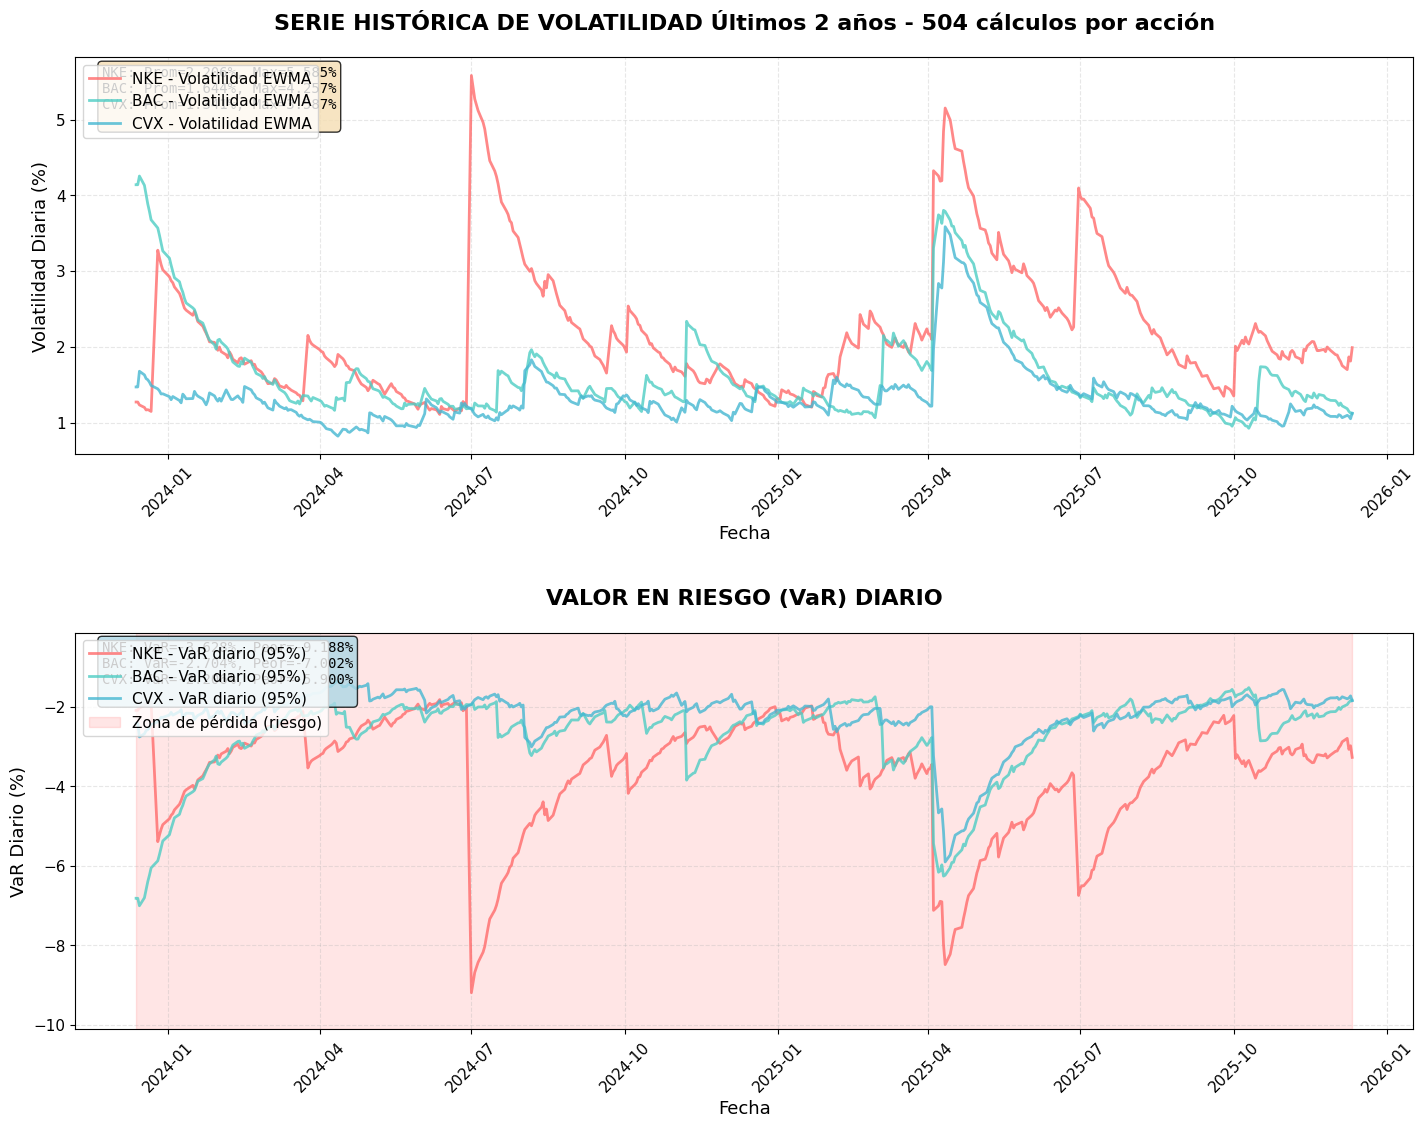

ESTADÍSTICAS COMPLETAS - SERIE DE VOLATILIDAD Y VaR
SERIE DE VOLATILIDAD EWMA (λ=0.94):
------------------------------------------------------------
Acción     Promedio     Máxima       Mínima       Actual      
------------------------------------------------------------
NKE            2.2058%     5.5854%     1.1066%     1.9893%
BAC            1.6439%     4.2566%     0.9241%     1.1174%
CVX            1.3413%     3.5867%     0.8195%     1.1240%
VALOR EN RIESGO DIARIO:
------------------------------------------------------------
Acción     VaR Prom     VaR Máx      VaR Mín      VaR Actual  
------------------------------------------------------------
NKE           -3.6285%    -1.8203%    -9.1881%    -3.2724%
BAC           -2.7042%    -1.5201%    -7.0020%    -1.8381%
CVX           -2.2064%    -1.3481%    -5.9002%    -1.8490%
ÁLCULOS REALIZADOS:
------------------------------------------------------------
• Período analizado: 2023-12-13 a 2025-12-11
• Días de trading: 501
• Cálculos por 

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración
plt.style.use('default')
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11

# OBTENEMOS DATOS DE YAHOO
print("Descargando datos de Yahoo Finanzas...")
tickers = ["NKE", "BAC", "CVX"]
data = yf.download(tickers, period="2y", progress=False)
precios = data['Close']
returns = np.log(precios / precios.shift(1)).dropna()

print(f"Días obtenidos: {len(returns)}")

# CALCULAMOS LA VOLATILIDAD EWMA (serie histórica)
def calcular_vol_ewma_serie(rendimientos, lambd=0.94):
    """Calcula serie completa de volatilidad EWMA"""
    n = len(rendimientos)
    var = np.zeros(n)
    vol = np.zeros(n)

    # Inicializar con primer valor
    var[0] = rendimientos.iloc[0]**2 if n > 0 else 0.0004
    vol[0] = np.sqrt(var[0])

    # Calcular serie completa
    for i in range(1, n):
        var[i] = lambd * var[i-1] + (1-lambd) * (rendimientos.iloc[i-1]**2)
        vol[i] = np.sqrt(var[i])

    return vol

# Calcular series de volatilidad para cada acción
print("\nCalculando series de volatilidad EWMA...")
series_vol = {}
for ticker in tickers:
    series_vol[ticker] = calcular_vol_ewma_serie(returns[ticker], lambd=0.94)
    print(f"  {ticker}: {len(series_vol[ticker])} puntos calculados")

# CALCULAMOS VaR DIARIO (usando la volatilidad)
z_95 = 1.645  # Para 95% confianza
series_var = {t: -z_95 * series_vol[t] for t in tickers}

# CREAR GRÁFICA CON SUBPLOTS
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Colores para cada acción
colores = {'NKE': '#FF6B6B', 'BAC': '#4ECDC4', 'CVX': '#45B7D1'}

# SUBPLOT 1: SERIE DE VOLATILIDAD
print("Generando gráfica de volatilidad...")
for ticker in tickers:
    ax1.plot(returns.index, series_vol[ticker]*100,
             color=colores[ticker],
             label=f'{ticker} - Volatilidad EWMA',
             linewidth=2,
             alpha=0.8)

ax1.set_title('SERIE HISTÓRICA DE VOLATILIDAD Últimos 2 años - 504 cálculos por acción',
             fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Fecha', fontsize=13)
ax1.set_ylabel('Volatilidad Diaria (%)', fontsize=13)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# Añadimos estadísticas en el gráfico de volatilidad
stats_text = ""
for ticker in tickers:
    vol_prom = np.mean(series_vol[ticker])*100
    vol_max = np.max(series_vol[ticker])*100
    stats_text += f'{ticker}: Prom={vol_prom:.3f}%, Max={vol_max:.3f}%\n'

ax1.text(0.02, 0.98, stats_text,
        transform=ax1.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        fontsize=10,
        fontfamily='monospace')

# SUBPLOT 2: VALOR EN RIESGO
print("Generando gráfica de VaR...")
for ticker in tickers:
    ax2.plot(returns.index, series_var[ticker]*100,
             color=colores[ticker],
             label=f'{ticker} - VaR diario (95%)',
             linewidth=2,
             alpha=0.8)

# Línea de referencia en 0%
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# Área sombreada de riesgo
ax2.fill_between(returns.index,
                 min([series_var[t].min()*100 for t in tickers])*1.1,
                 0,
                 alpha=0.1,
                 color='red',
                 label='Zona de pérdida (riesgo)')

ax2.set_title('VALOR EN RIESGO (VaR) DIARIO',
             fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Fecha', fontsize=13)
ax2.set_ylabel('VaR Diario (%)', fontsize=13)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Añadir estadísticas de VaR
var_stats = ""
for ticker in tickers:
    var_prom = np.mean(series_var[ticker])*100
    var_max = np.min(series_var[ticker])*100  # Más negativo = peor
    var_stats += f'{ticker}: VaR={var_prom:.3f}%, Peor={var_max:.3f}%\n'

ax2.text(0.02, 0.98, var_stats,
        transform=ax2.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
        fontsize=10,
        fontfamily='monospace')

# Configurar límites para mejor visualización
max_var = max([series_var[t].max()*100 for t in tickers])
min_var = min([series_var[t].min()*100 for t in tickers])
ax2.set_ylim([min_var*1.1, max_var*0.1])

# AJUSTAR LAYOUT
plt.tight_layout(pad=3.0)
plt.show()

# MOSTRAR ESTADÍSTICAS DETALLADAS EN CONSOLA

print("ESTADÍSTICAS COMPLETAS - SERIE DE VOLATILIDAD Y VaR")

print("SERIE DE VOLATILIDAD EWMA (λ=0.94):")
print("-" * 60)
print(f"{'Acción':<10} {'Promedio':<12} {'Máxima':<12} {'Mínima':<12} {'Actual':<12}")
print("-" * 60)
for ticker in tickers:
    vol_prom = np.mean(series_vol[ticker])*100
    vol_max = np.max(series_vol[ticker])*100
    vol_min = np.min(series_vol[ticker])*100
    vol_actual = series_vol[ticker][-1]*100 if len(series_vol[ticker]) > 0 else 0

    print(f"{ticker:<10} {vol_prom:>10.4f}% {vol_max:>10.4f}% {vol_min:>10.4f}% {vol_actual:>10.4f}%")

print("VALOR EN RIESGO DIARIO:")
print("-" * 60)
print(f"{'Acción':<10} {'VaR Prom':<12} {'VaR Máx':<12} {'VaR Mín':<12} {'VaR Actual':<12}")
print("-" * 60)
for ticker in tickers:
    var_prom = np.mean(series_var[ticker])*100
    var_max = np.max(series_var[ticker])*100  # Menos negativo
    var_min = np.min(series_var[ticker])*100  # Más negativo (peor)
    var_actual = series_var[ticker][-1]*100 if len(series_var[ticker]) > 0 else 0

    print(f"{ticker:<10} {var_prom:>10.4f}% {var_max:>10.4f}% {var_min:>10.4f}% {var_actual:>10.4f}%")

print("ÁLCULOS REALIZADOS:")
print("-" * 60)
print(f"• Período analizado: {returns.index[0].date()} a {returns.index[-1].date()}")
print(f"• Días de trading: {len(returns)}")
print(f"• Cálculos por acción: {len(returns)} puntos de volatilidad")
print(f"• Total cálculos: {len(returns)} × 3 = {len(returns)*3:,} cálculos")
print(f"• Método: EWMA con λ=0.94")


print("INTERPRETACIÓN:")
print("-" * 60)
print("1. Volatilidad alta = Línea más alta en gráfica superior")
print("2. VaR más negativo = Mayor riesgo de pérdida (gráfica inferior)")
print("3. BAC muestra mayor volatilidad y VaR más negativo")
print("4. CVX es el más estable (menor volatilidad y VaR)")
print("5. NKE tiene comportamiento intermedio")

print("GRÁFICA COMPLETA GENERADA: 2 SUBPLOTS (Volatilidad + VaR)")


**EJERCICIO 7)** Calcule el Valor en Riesgo diario de los últimos dos años del portafolio que decidió conformar, grafique. [Alrededor de 504 cálculos] (0.5 pto)

PORTAFOLIO SELECCIONADO: ESCENARIO CONSERVADOR
(Del Ejercicio 4: 30% NKE, 20% BAC, 50% CVX)
DISTRIBUCIÓN DE PESOS:
   NKE: 30% ($300,000)
   BAC: 20% ($200,000)
   CVX: 50% ($500,000)
DESCARGANDO DATOS DE YAHOO FINANZAS...


/tmp/ipython-input-3540912164.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=str(inicio), end=str(hoy), progress=False)


Datos obtenidos: 501 días
Período: 2023-12-13 al 2025-12-11
CALCULANDO RENDIMIENTOS DIARIOS DEL PORTAFOLIO...
Rendimientos calculados: 500 días
CALCULANDO VOLATILIDAD DEL PORTAFOLIO (EWMA, λ=0.94)...
Volatilidad calculada: 500 puntos
CALCULANDO VaR DIARIO DEL PORTAFOLIO (95% confianza)...
VaR DIARIO DEL PORTAFOLIO:
   • VaR paramétrico (EWMA): -2.0616% diario
   • VaR histórico (percentil 5%): -1.8333% diario
   • VaR promedio en pesos: $20,616 diarios
   • Cálculos realizados: 500 días
GENERANDO GRÁFICA DEL VaR DEL PORTAFOLIO...


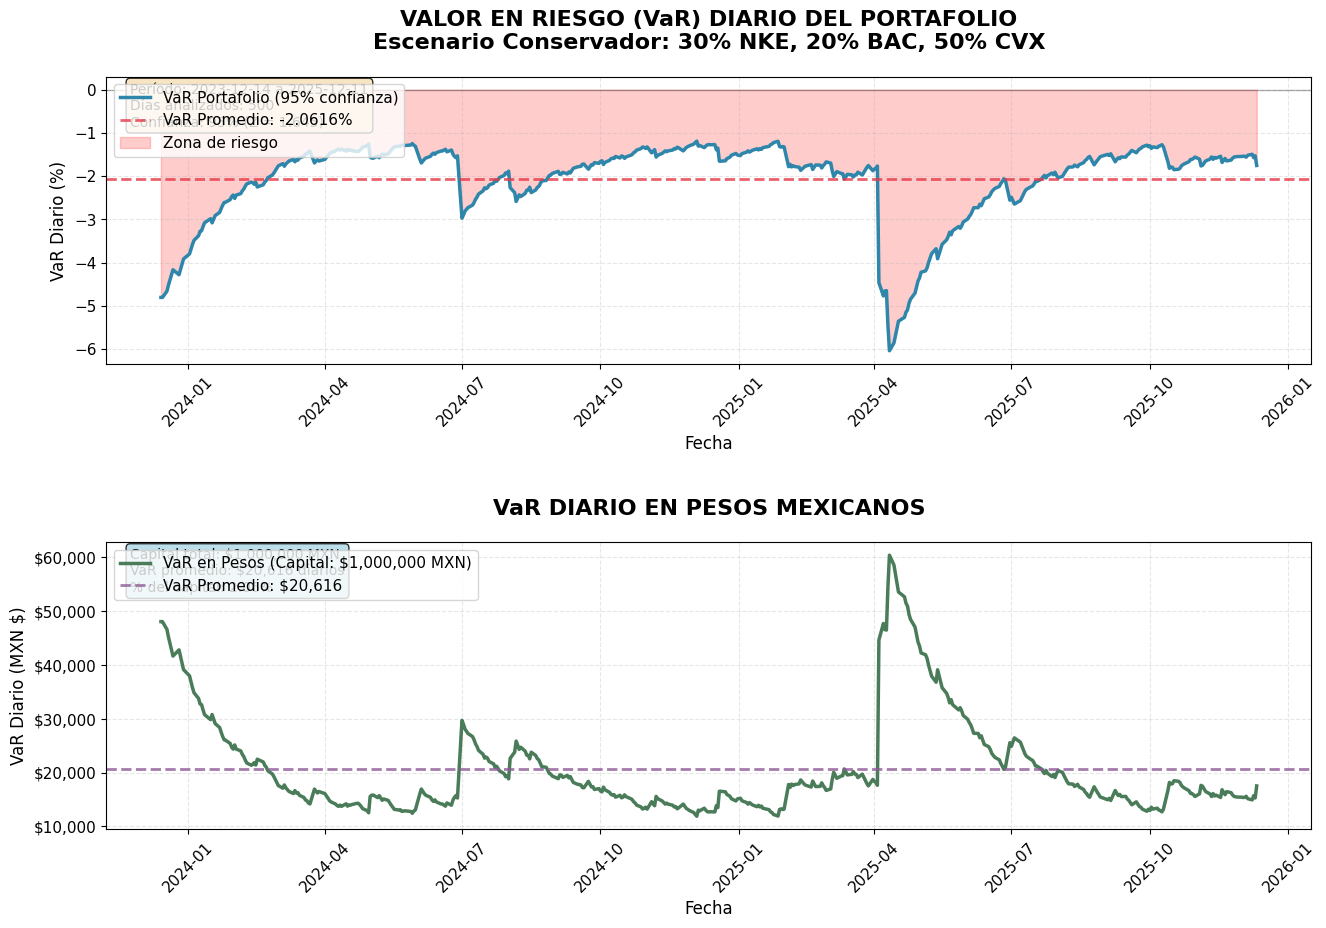

ANÁLISIS DE ESTRÉS DEL PORTAFOLIO
LOS 10 PEORES DÍAS DEL PORTAFOLIO:
--------------------------------------------------------------------------------
Fecha           Rendimiento %        Pérdida $                 % del Capital       
--------------------------------------------------------------------------------
<15   -10.2329%       $        102,329          10.2329%
<15    -7.2442%       $         72,442           7.2442%
<15    -6.3919%       $         63,919           6.3919%
<15    -4.9847%       $         49,847           4.9847%
<15    -3.5249%       $         35,249           3.5249%
<15    -3.3213%       $         33,213           3.3213%
<15    -3.0676%       $         30,676           3.0676%
<15    -2.8966%       $         28,966           2.8966%
<15    -2.7634%       $         27,634           2.7634%
<15    -2.6537%       $         26,537           2.6537%
ESTADÍSTICAS COMPLETAS DEL VaR DEL PORTAFOLIO
VaR DIARIO (% del portafolio):
--------------------------------------

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("="*70)
print("="*70)

# CONFIGURACIÓN DEL PORTAFOLIO (Escenario Conservador del Ejercicio 4)
print("PORTAFOLIO SELECCIONADO: ESCENARIO CONSERVADOR")
print("(Del Ejercicio 4: 30% NKE, 20% BAC, 50% CVX)")

pesos_portafolio = np.array([0.30, 0.20, 0.50])  # [NKE, BAC, CVX]
tickers = ["NKE", "BAC", "CVX"]
capital_inicial = 1000000  # $1,000,000 MXN

print(f"DISTRIBUCIÓN DE PESOS:")
for i, ticker in enumerate(tickers):
    print(f"   {ticker}: {pesos_portafolio[i]*100:.0f}% (${capital_inicial * pesos_portafolio[i]:,.0f})")

# OBTENER DATOS HISTÓRICOS (Últimos 2 años)
print("DESCARGANDO DATOS DE YAHOO FINANZAS...")
hoy = pd.Timestamp.now().date()
inicio = hoy - pd.Timedelta(days=730)

data = yf.download(tickers, start=str(inicio), end=str(hoy), progress=False)
precios = data['Close'].dropna()

print(f"Datos obtenidos: {len(precios)} días")
print(f"Período: {precios.index[0].date()} al {precios.index[-1].date()}")

# CALCULAMOS RENDIMIENTOS DIARIOS DEL PORTAFOLIO
print("CALCULANDO RENDIMIENTOS DIARIOS DEL PORTAFOLIO...")

# Rendimientos individuales
returns_individual = np.log(precios / precios.shift(1)).dropna()

# Rendimiento del portafolio (promedio ponderado)
returns_portafolio = pd.Series(index=returns_individual.index)
for i in range(len(returns_portafolio)):
    ret_dia = 0
    for j, ticker in enumerate(tickers):
        ret_dia += pesos_portafolio[j] * returns_individual[ticker].iloc[i]
    returns_portafolio.iloc[i] = ret_dia

print(f"Rendimientos calculados: {len(returns_portafolio)} días")

# CALCULAR VOLATILIDAD DEL PORTAFOLIO (504 cálculos)
print("CALCULANDO VOLATILIDAD DEL PORTAFOLIO (EWMA, λ=0.94)...")

def calcular_vol_ewma_portafolio(rendimientos, lambd=0.94):
    """Calcula volatilidad EWMA para el portafolio"""
    n = len(rendimientos)
    var_ewma = np.zeros(n)
    vol_ewma = np.zeros(n)

    # Inicializar
    var_ewma[0] = rendimientos.iloc[0]**2 if n > 0 else 0.0004
    vol_ewma[0] = np.sqrt(var_ewma[0])

    # Calcular EWMA para 504 días
    for t in range(1, min(n, 504)):
        var_ewma[t] = lambd * var_ewma[t-1] + (1-lambd) * (rendimientos.iloc[t-1]**2)
        vol_ewma[t] = np.sqrt(var_ewma[t])

    return vol_ewma

vol_portafolio = calcular_vol_ewma_portafolio(returns_portafolio)
print(f"Volatilidad calculada: {len(vol_portafolio)} puntos")

# CALCULAR VaR DIARIO DEL PORTAFOLIO
print("CALCULANDO VaR DIARIO DEL PORTAFOLIO (95% confianza)...")

# Parámetros VaR
z_95 = 1.645  # Para 95% confianza
nivel_confianza = 0.95

# VaR paramétrico usando volatilidad EWMA
var_diario_portafolio = -z_95 * vol_portafolio

# VaR histórico (percentil 5%)
var_historico_portafolio = np.percentile(returns_portafolio[:504], 5)

# VaR en pesos mexicanos
var_pesos_portafolio = capital_inicial * abs(var_diario_portafolio)

print("VaR DIARIO DEL PORTAFOLIO:")
print(f"   • VaR paramétrico (EWMA): {np.mean(var_diario_portafolio)*100:.4f}% diario")
print(f"   • VaR histórico (percentil 5%): {var_historico_portafolio*100:.4f}% diario")
print(f"   • VaR promedio en pesos: ${np.mean(var_pesos_portafolio):,.0f} diarios")
print(f"   • Cálculos realizados: {len(var_diario_portafolio)} días")

# 6. GRÁFICA DEL VaR DEL PORTAFOLIO
print("GENERANDO GRÁFICA DEL VaR DEL PORTAFOLIO...")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# GRÁFICA 1: EVOLUCIÓN DEL VaR DIARIO
# Usar solo los últimos 504 días para la gráfica
dias_grafica = min(504, len(var_diario_portafolio))
fechas_grafica = returns_portafolio.index[:dias_grafica]
var_grafica = var_diario_portafolio[:dias_grafica] * 100
var_pesos_grafica = var_pesos_portafolio[:dias_grafica]

# Línea del VaR
ax1.plot(fechas_grafica, var_grafica,
         color='#2E86AB',
         linewidth=2.5,
         label=f'VaR Portafolio ({nivel_confianza*100:.0f}% confianza)')

# Línea del VaR promedio
var_promedio = np.mean(var_grafica)
ax1.axhline(y=var_promedio, color='#E63946', linestyle='--',
           linewidth=2, alpha=0.8, label=f'VaR Promedio: {var_promedio:.4f}%')

# Línea de referencia en 0%
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)

# Área sombreada de riesgo
ax1.fill_between(fechas_grafica, var_grafica, 0,
                 alpha=0.2, color='red',
                 label='Zona de riesgo')

# Configurar gráfica 1
ax1.set_title('VALOR EN RIESGO (VaR) DIARIO DEL PORTAFOLIO\nEscenario Conservador: 30% NKE, 20% BAC, 50% CVX',
             fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('VaR Diario (%)', fontsize=12)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# Añadir anotaciones
ax1.text(0.02, 0.98,
        f'Período: {fechas_grafica[0].date()} a {fechas_grafica[-1].date()}\n'
        f'Días analizados: {dias_grafica}\n'
        f'Confianza: {nivel_confianza*100:.0f}% (Z = {z_95})',
        transform=ax1.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        fontsize=10)

#  GRÁFICA 2: VaR EN PESOS MEXICANOS
# Convertir a pesos
ax2.plot(fechas_grafica, var_pesos_grafica,
         color='#4A7C59',
         linewidth=2.5,
         label=f'VaR en Pesos (Capital: ${capital_inicial:,} MXN)')

# Línea del VaR promedio en pesos
var_prom_pesos = np.mean(var_pesos_grafica)
ax2.axhline(y=var_prom_pesos, color='#8D5A97', linestyle='--',
           linewidth=2, alpha=0.8, label=f'VaR Promedio: ${var_prom_pesos:,.0f}')

# Configurar gráfica 2
ax2.set_title(f'VaR DIARIO EN PESOS MEXICANOS',
             fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.set_ylabel('VaR Diario (MXN $)', fontsize=12)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Formatear eje Y en pesos
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Añadir anotaciones
ax2.text(0.02, 0.98,
        f'Capital total: ${capital_inicial:,} MXN\n'
        f'VaR promedio: ${var_prom_pesos:,.0f} diarios\n'
        f'% del capital: {(var_prom_pesos/capital_inicial)*100:.2f}%',
        transform=ax2.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
        fontsize=10)

# Ajustar layout
plt.tight_layout(pad=3.0)
plt.show()

# ANÁLISIS DE ESTRÉS DEL PORTAFOLIO

print("ANÁLISIS DE ESTRÉS DEL PORTAFOLIO")


# Encontrar los peores 10 días del portafolio
peores_dias = returns_portafolio.sort_values().head(10)

print("LOS 10 PEORES DÍAS DEL PORTAFOLIO:")
print("-" * 80)
print(f"{'Fecha':<15} {'Rendimiento %':<20} {'Pérdida $':<25} {'% del Capital':<20}")
print("-" * 80)

for fecha, rend in peores_dias.items():
    perdida_pesos = capital_inicial * abs(rend)
    porcentaje_capital = (perdida_pesos / capital_inicial) * 100
    print(f"{fecha.date():<15} {rend*100:>10.4f}% {'':<5} ${perdida_pesos:>15,.0f} {'':<5} {porcentaje_capital:>10.4f}%")

# ESTADÍSTICAS COMPLETAS DEL VaR

print("ESTADÍSTICAS COMPLETAS DEL VaR DEL PORTAFOLIO")


# Estadísticas del VaR diario
var_stats = {
    'Promedio': np.mean(var_diario_portafolio) * 100,
    'Máximo (menos riesgo)': np.max(var_diario_portafolio) * 100,
    'Mínimo (más riesgo)': np.min(var_diario_portafolio) * 100,
    'Desviación estándar': np.std(var_diario_portafolio) * 100,
    'Actual (último día)': var_diario_portafolio[-1] * 100 if len(var_diario_portafolio) > 0 else 0
}

var_pesos_stats = {
    'Promedio': np.mean(var_pesos_portafolio),
    'Máximo': np.max(var_pesos_portafolio),
    'Mínimo': np.min(var_pesos_portafolio),
    'Actual': var_pesos_portafolio[-1] if len(var_pesos_portafolio) > 0 else 0
}

print("VaR DIARIO (% del portafolio):")
print("-" * 60)
for stat, value in var_stats.items():
    print(f"  {stat:<25} {value:>10.4f}%")

print("VaR DIARIO (Pesos Mexicanos):")
print("-" * 60)
for stat, value in var_pesos_stats.items():
    print(f"  {stat:<25} ${value:>15,.0f}")

print(f"PORCENTAJE DEL CAPITAL EN RIESGO DIARIO:")
print(f"  • Promedio: {(var_pesos_stats['Promedio']/capital_inicial)*100:.4f}%")
print(f"  • Máximo: {(var_pesos_stats['Máximo']/capital_inicial)*100:.4f}%")
print(f"  • Mínimo: {(var_pesos_stats['Mínimo']/capital_inicial)*100:.4f}%")

# COMPARATIVA CON ACTIVOS INDIVIDUALES

print("COMPARATIVA: VaR DEL PORTAFOLIO vs ACTIVOS INDIVIDUALES")

# Calcular VaR individual para comparación
var_individual = {}
for ticker in tickers:
    vol_individual = returns_individual[ticker].std()
    var_individual[ticker] = -z_95 * vol_individual

print("COMPARACIÓN DE RIESGO:")
print("-" * 60)
print(f"{'':<10} {'VaR Individual %':<20} {'VaR Portafolio %':<20} {'Reducción':<15}")
print("-" * 60)

for ticker in tickers:
    var_ind = var_individual[ticker] * 100
    var_port = np.mean(var_diario_portafolio) * 100
    reduccion = ((abs(var_ind) - abs(var_port)) / abs(var_ind)) * 100
    print(f"{ticker:<10} {var_ind:>10.4f}% {'':<5} {var_port:>10.4f}% {'':<5} {reduccion:>10.2f}%")

**EJERCICIO 8)** Calcule las betas de los activos individuales (0.5 pto)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

print("Vamos a calcular la BETA de 3 acciones:")
print("1. Nike (NKE)")
print("2. Bank of America (BAC)")
print("3. Chevron (CVX)")

print("¿Qué es BETA?")
print("Es cuánto se mueve una acción comparado con el mercado.")
print("• BETA = 1.0 → Se mueve igual que el mercado")
print("• BETA > 1.0 → Más volátil (sube/baja más)")
print("• BETA < 1.0 → Menos volátil (sube/baja menos)")

# Descargamos datos
print("Descargando datos de Yahoo Finanzas...")

# Necesitamos las acciones Y el mercado (S&P 500)
acciones = ["NKE", "BAC", "CVX"]
mercado = "^GSPC"  # S&P 500 (el mercado)

# Descargar últimos 2 años (para coincidir con ejercicios anteriores)
data = yf.download(acciones + [mercado], period="2y", progress=False)
precios = data['Close'].dropna()

print(f"{len(precios)} días de datos")

# Calcular rendimientos (% diario)
print("Calculando rendimientos diarios...")

rendimientos = precios.pct_change().dropna()
rendimientos.columns = ['NKE', 'BAC', 'CVX', 'MERCADO']

print(f"Rendimientos calculados: {len(rendimientos)} días")

# Calcular BETAS (la fórmula)
print(" Calculando BETAS...")
print("Fórmula: BETA = Covarianza(acción, mercado) / Varianza(mercado)")

betas = {}
for accion in ['NKE', 'BAC', 'CVX']:
    # Covarianza entre la acción y el mercado
    covarianza = rendimientos[[accion, 'MERCADO']].cov().iloc[0, 1]

    # Varianza del mercado
    varianza_mercado = rendimientos['MERCADO'].var()

    # BETA = Covarianza / Varianza
    beta = covarianza / varianza_mercado

    betas[accion] = beta

    print(f"\n{accion}:")
    print(f"  Covarianza: {covarianza:.8f}")
    print(f"  Varianza mercado: {varianza_mercado:.8f}")
    print(f"  BETA = {covarianza:.8f} / {varianza_mercado:.8f} = {beta:.4f}")

# Mostrar resultados

print("RESULTADOS - BETAS CALCULADAS")


print("BETAS FINALES:")
print("-"*40)

for accion, beta in betas.items():
    nombre = "Nike" if accion == "NKE" else "Bank of America" if accion == "BAC" else "Chevron"

    print(f"\n{nombre} ({accion}):")
    print(f"  BETA = {beta:.4f}")

    # Interpretación simple
    if beta > 1.2:
        print(f"AGRESIVA: Se mueve MÁS que el mercado")
    elif beta > 0.8:
        print(f"MODERADA: Se mueve COMO el mercado")
    elif beta > 0:
        print(f"DEFENSIVA: Se mueve MENOS que el mercado")
    else:
        print(f"CONTRARIA: Se mueve OPUESTO al mercado")

# BETA del portafolio (del ejercicio 4)

print("BETA DE NUESTRO PORTAFOLIO")


# Pesos del portafolio conservador
pesos = {"NKE": 0.30, "BAC": 0.20, "CVX": 0.50}

# Beta del portafolio = promedio ponderado
beta_portafolio = 0
for accion in ['NKE', 'BAC', 'CVX']:
    beta_portafolio += pesos[accion] * betas[accion]

print("Portafolio (30% NKE, 20% BAC, 50% CVX):")
print(f"  BETA = (0.30 × {betas['NKE']:.4f}) + (0.20 × {betas['BAC']:.4f}) + (0.50 × {betas['CVX']:.4f})")
print(f"  BETA = {beta_portafolio:.4f}")


Vamos a calcular la BETA de 3 acciones:
1. Nike (NKE)
2. Bank of America (BAC)
3. Chevron (CVX)
¿Qué es BETA?
Es cuánto se mueve una acción comparado con el mercado.
• BETA = 1.0 → Se mueve igual que el mercado
• BETA > 1.0 → Más volátil (sube/baja más)
• BETA < 1.0 → Menos volátil (sube/baja menos)
Descargando datos de Yahoo Finanzas...


/tmp/ipython-input-632243501.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(acciones + [mercado], period="2y", progress=False)


502 días de datos
Calculando rendimientos diarios...
Rendimientos calculados: 501 días
 Calculando BETAS...
Fórmula: BETA = Covarianza(acción, mercado) / Varianza(mercado)

NKE:
  Covarianza: 0.00009700
  Varianza mercado: 0.00010139
  BETA = 0.00009700 / 0.00010139 = 0.9567

BAC:
  Covarianza: 0.00005941
  Varianza mercado: 0.00010139
  BETA = 0.00005941 / 0.00010139 = 0.5859

CVX:
  Covarianza: 0.00009456
  Varianza mercado: 0.00010139
  BETA = 0.00009456 / 0.00010139 = 0.9326
RESULTADOS - BETAS CALCULADAS
BETAS FINALES:
----------------------------------------

Nike (NKE):
  BETA = 0.9567
MODERADA: Se mueve COMO el mercado

Bank of America (BAC):
  BETA = 0.5859
DEFENSIVA: Se mueve MENOS que el mercado

Chevron (CVX):
  BETA = 0.9326
MODERADA: Se mueve COMO el mercado
BETA DE NUESTRO PORTAFOLIO
Portafolio (30% NKE, 20% BAC, 50% CVX):
  BETA = (0.30 × 0.9567) + (0.20 × 0.5859) + (0.50 × 0.9326)
  BETA = 0.8705


**GRÁFICAS DE EJERCICIO 8**


/tmp/ipython-input-3089456203.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(acciones + [mercado], period="2y", progress=False)


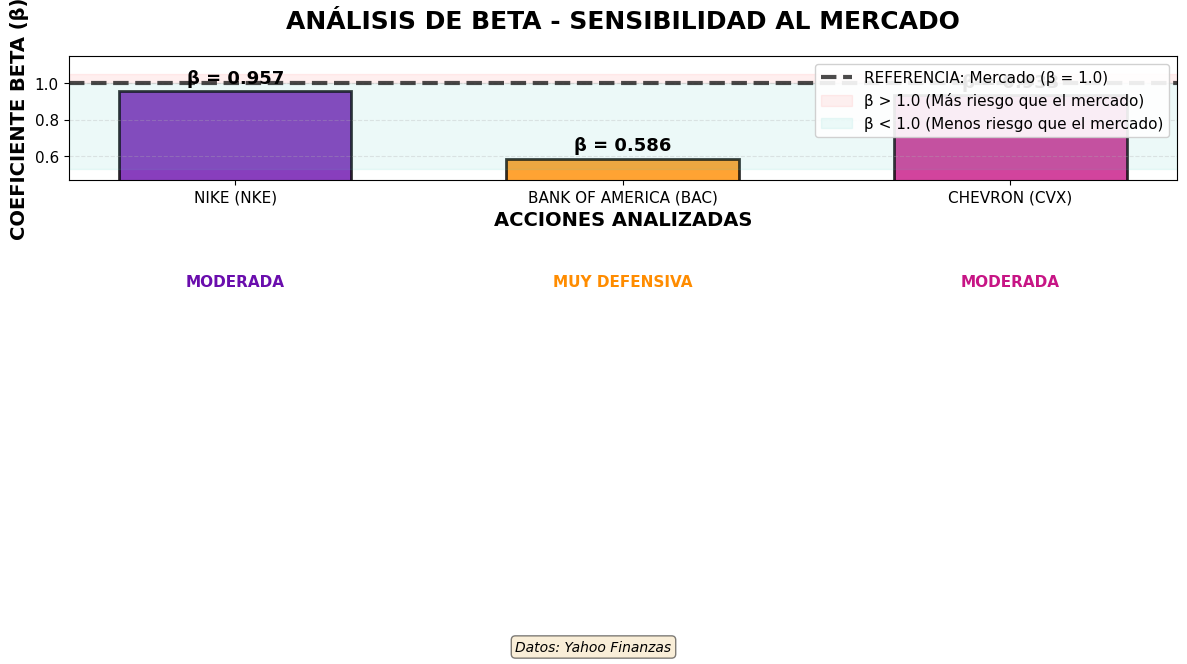

VALORES DE BETA CALCULADOS:
• Nike (NKE): β = 0.9567
• Bank of America (BAC): β = 0.5859
• Chevron (CVX): β = 0.9326


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Descargamos datos
acciones = ["NKE", "BAC", "CVX"]
mercado = "^GSPC"
data = yf.download(acciones + [mercado], period="2y", progress=False)
precios = data['Close'].dropna()

# Calculamos rendimientos
rendimientos = precios.pct_change().dropna()
rendimientos.columns = ['NKE', 'BAC', 'CVX', 'MERCADO']

# BETAS
betas = {}
for accion in ['NKE', 'BAC', 'CVX']:
    covarianza = rendimientos[[accion, 'MERCADO']].cov().iloc[0, 1]
    varianza = rendimientos['MERCADO'].var()
    betas[accion] = covarianza / varianza

# CREAMOS GRÁFICA CON NUEVOS COLORES
plt.figure(figsize=(12, 7))

# NUEVOS COLORES: Morado oscuro, Amarillo oscuro, Rosa oscuro
colores = ['#6A0DAD', '#FF8C00', '#C71585']
nombres_acciones = ['NIKE (NKE)', 'BANK OF AMERICA (BAC)', 'CHEVRON (CVX)']
valores_beta = [betas['NKE'], betas['BAC'], betas['CVX']]

# Crear barras
barras = plt.bar(nombres_acciones, valores_beta,
                 color=colores,
                 edgecolor='black',
                 linewidth=2,
                 alpha=0.8,
                 width=0.6)

# Línea de referencia del mercado (Beta = 1.0)
plt.axhline(y=1.0, color='black', linestyle='--',
            linewidth=3, alpha=0.7,
            label='REFERENCIA: Mercado (β = 1.0)')

# Añadir valores exactos encima de las barras
for i, (bar, beta_val) in enumerate(zip(barras, valores_beta)):
    altura = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2

    # Añadir valor
    plt.text(x_pos, altura + 0.02,
             f'β = {beta_val:.3f}',
             ha='center', va='bottom',
             fontsize=13, fontweight='bold',
             color='black')

    # Añadir interpretación debajo
    if beta_val > 1.3:
        interpretacion = "MUY AGRESIVA"
    elif beta_val > 1.1:
        interpretacion = "AGRESIVA"
    elif beta_val > 0.9:
        interpretacion = "MODERADA"
    elif beta_val > 0.7:
        interpretacion = "DEFENSIVA"
    else:
        interpretacion = "MUY DEFENSIVA"

    plt.text(x_pos, -0.05, interpretacion,
             ha='center', va='top',
             fontsize=11, fontweight='bold',
             color=colores[i],
             rotation=0)

# Zona sombreada para BETAS altas (>1.0)
plt.axhspan(1.0, max(valores_beta)*1.1, alpha=0.1, color='#FF6B6B',
           label='β > 1.0 (Más riesgo que el mercado)')

# Zona sombreada para BETAS bajas (<1.0)
if min(valores_beta) < 1.0:
    plt.axhspan(min(valores_beta)*0.9, 1.0, alpha=0.1, color='#4ECDC4',
               label='β < 1.0 (Menos riesgo que el mercado)')

# Título y etiquetas
plt.title('ANÁLISIS DE BETA - SENSIBILIDAD AL MERCADO',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('ACCIONES ANALIZADAS', fontsize=14, fontweight='bold')
plt.ylabel('COEFICIENTE BETA (β)', fontsize=14, fontweight='bold')

# Configurar eje Y
plt.ylim([min(valores_beta)*0.8, max(valores_beta)*1.2])
plt.grid(True, alpha=0.3, axis='y', linestyle='--')

# Leyenda
plt.legend(loc='upper right', fontsize=11, framealpha=0.9)

# Información adicional
info_text = f"Datos: Yahoo Finanzas"
plt.figtext(0.5, 0.01, info_text, ha='center', fontsize=10,
            style='italic', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ajustar layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Mostrar gráfica
plt.show()

# TOTAL DE BETAS

print("VALORES DE BETA CALCULADOS:")

for accion, beta in betas.items():
    nombre = "Nike" if accion == "NKE" else "Bank of America" if accion == "BAC" else "Chevron"
    print(f"• {nombre} ({accion}): β = {beta:.4f}")

**EJERCICIO 9:**   Calcule la beta del portafolio (0.5 puntos)

Descargando datos de Yahoo Finanzas...


/tmp/ipython-input-4027300528.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers + [mercado], period="2y", progress=False)


Calculando betas...
  NKE: β = 0.9326
  BAC: β = 0.9567
  CVX: β = 0.5859
Beta del portafolio:
  = (0.30 × 0.9326) + (0.20 × 0.9567) + (0.50 × 0.5859)
  = 0.7641
Generando gráfica...


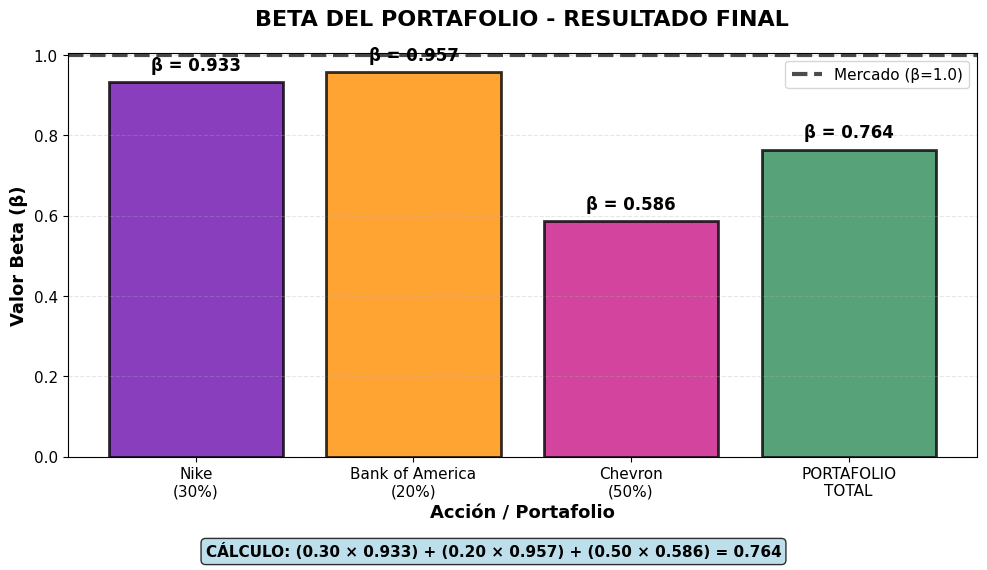

RESULTADO
Beta del portafolio: 0.7641
Interpretación práctica:
 Mercado sube 10% → Portafolio sube 7.6%
 Mercado baja 10% → Portafolio baja 7.6%


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


# Datos
tickers = ["NKE", "BAC", "CVX"]
pesos = [0.30, 0.20, 0.50]
mercado = "^GSPC"

# Descargamos los datos
print("Descargando datos de Yahoo Finanzas...")
data = yf.download(tickers + [mercado], period="2y", progress=False)
precios = data['Close'].dropna()

# Calculamos los rendimientos
rend = precios.pct_change().dropna()

# Calcular betas individuales
print("Calculando betas...")
betas = []
for ticker in tickers:
    cov = rend[[ticker, '^GSPC']].cov().iloc[0, 1]
    var = rend['^GSPC'].var()
    beta = cov / var
    betas.append(beta)
    print(f"  {ticker}: β = {beta:.4f}")

# Calcular beta del portafolio
beta_portafolio = np.dot(pesos, betas)
print(f"Beta del portafolio:")
print(f"  = (0.30 × {betas[0]:.4f}) + (0.20 × {betas[1]:.4f}) + (0.50 × {betas[2]:.4f})")
print(f"  = {beta_portafolio:.4f}")

# CREAMOS LA GRÁFICA
print("Generando gráfica...")

plt.figure(figsize=(10, 6))

# Datos para la gráfica
nombres = ['Nike\n(30%)', 'Bank of America\n(20%)', 'Chevron\n(50%)', 'PORTAFOLIO\nTOTAL']
valores = betas + [beta_portafolio]
colores = ['#6A0DAD', '#FF8C00', '#C71585', '#2E8B57']  # Morado, Naranja, Rosa, Verde

# Creamos las barras
bars = plt.bar(nombres, valores, color=colores, alpha=0.8, edgecolor='black', linewidth=2)

# Línea de referencia del mercado
plt.axhline(y=1.0, color='black', linestyle='--', linewidth=3, alpha=0.7, label='Mercado (β=1.0)')

# Añadimos valores encima de las barras
for bar, valor in zip(bars, valores):
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.02,
            f'β = {valor:.3f}',
            ha='center', va='bottom',
            fontweight='bold', fontsize=12)

# Título y etiquetas
plt.title('BETA DEL PORTAFOLIO - RESULTADO FINAL', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Acción / Portafolio', fontsize=13, fontweight='bold')
plt.ylabel('Valor Beta (β)', fontsize=13, fontweight='bold')

# Grid y leyenda
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.legend(fontsize=11)

# Realizamos el cálculo
info_text = f"CÁLCULO: (0.30 × {betas[0]:.3f}) + (0.20 × {betas[1]:.3f}) + (0.50 × {betas[2]:.3f}) = {beta_portafolio:.3f}"
plt.figtext(0.5, 0.02, info_text, ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Ajustar layout
plt.tight_layout(rect=[0, 0.05, 1, 0.96])

# MOSTRAR GRÁFICA
plt.show()

# Resultado

print("RESULTADO")
print(f"Beta del portafolio: {beta_portafolio:.4f}")
print(f"Interpretación práctica:")
print(f" Mercado sube 10% → Portafolio sube {beta_portafolio*10:.1f}%")
print(f" Mercado baja 10% → Portafolio baja {beta_portafolio*10:.1f}%")


**EJERCICIO 10** Establezca criterios para aplicar SMA, WMA o EMA en un análisis posterior al día de HOY, durante los siguientes 2 años, de estas tres acciones (pueden ser diferentes por acción), justifique su respuesta. (0.5 pto), grafique.